In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style='whitegrid')
%matplotlib inline

In [26]:
liar_path = "../data/liar/train.tsv"
df_liar = pd.read_csv(liar_path, sep="\t", header=None)

df_liar.columns = [
    "id", "label", "statement", "subject", "speaker", "job_title", "state_info",
    "party_affiliation", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire",
    "context"
]

label_map = {
    "true": "REAL",
    "mostly-true": "REAL",
    "half-true": "REAL",
    "false": "FAKE",
    "barely-true": "FAKE",
    "pants-fire": "FAKE"
}
df_liar = df_liar[df_liar["label"].isin(label_map.keys())]
df_liar["label"] = df_liar["label"].map(label_map)

df_liar = df_liar[["statement", "label"]].rename(columns={"statement": "text"})
df_liar["source"] = "liar"

df_liar.head()

,text,label,source
0,Says the Annies List political group supports ...,FAKE,liar
1,When did the decline of coal start? It started...,REAL,liar
2,"Hillary Clinton agrees with John McCain ""by vo...",REAL,liar
3,Health care reform legislation is likely to ma...,FAKE,liar
4,The economic turnaround started at the end of ...,REAL,liar


In [ ]:
df_fake = pd.read_csv("../data/ISOT/Fake.csv")
df_real = pd.read_csv("../data/ISOT/True.csv")

df_fake = df_fake[["text"]].copy()
df_fake["label"] = "FAKE"

df_real = df_real[["text"]].copy()
df_real["label"] = "REAL"

df_isot = pd.concat([df_fake, df_real], ignore_index=True)
df_isot["source"] = "isot"
df_isot = df_isot.dropna(subset=["text"])

df_isot.head()


,text,label,source
0,Donald Trump just couldn t wish all Americans ...,FAKE,isot
1,House Intelligence Committee Chairman Devin Nu...,FAKE,isot
2,"On Friday, it was revealed that former Milwauk...",FAKE,isot
3,"On Christmas day, Donald Trump announced that ...",FAKE,isot
4,Pope Francis used his annual Christmas Day mes...,FAKE,isot


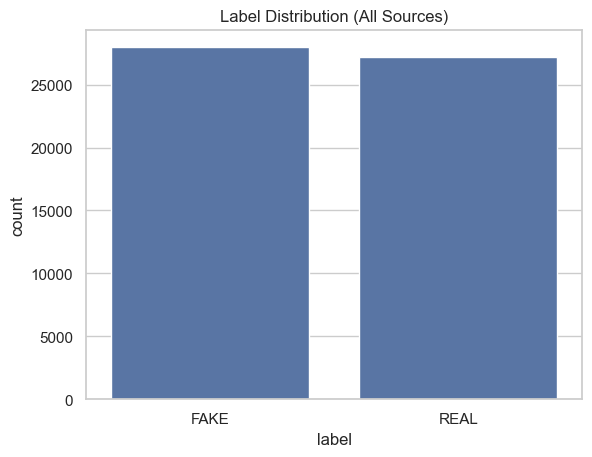

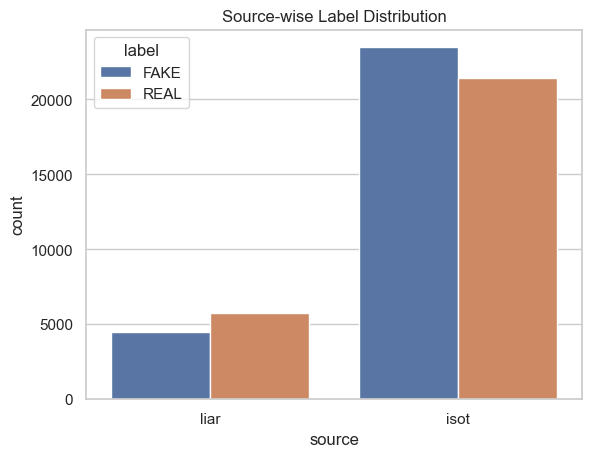

In [29]:
# Combine LIAR and ISOT
df_all = pd.concat([df_liar, df_isot], ignore_index=True)

sns.countplot(data=df_all, x="label")
plt.title("Label Distribution (All Sources)")
plt.show()

sns.countplot(data=df_all, x="source", hue="label")
plt.title("Source-wise Label Distribution")
plt.show()


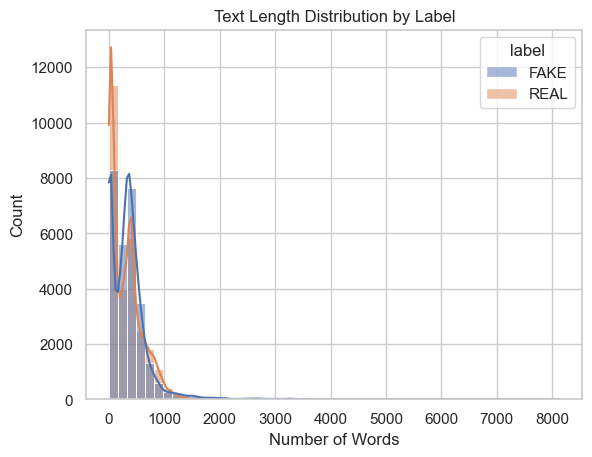

In [30]:
df_all["text_length"] = df_all["text"].apply(lambda x: len(str(x).split()))
sns.histplot(df_all, x="text_length", bins=50, hue="label", kde=True)
plt.title("Text Length Distribution by Label")
plt.xlabel("Number of Words")
plt.show()


In [32]:
df_all[["text", "label", "source"]].to_csv("../data/processed/all_cleaned_news.csv", index=False)
print("Cleaned dataset saved to data/processed/all_cleaned_news.csv")

Cleaned dataset saved to data/processed/all_cleaned_news.csv
